r2_score: 0.4501495976675758 rand_state = 10


<Figure size 640x480 with 0 Axes>

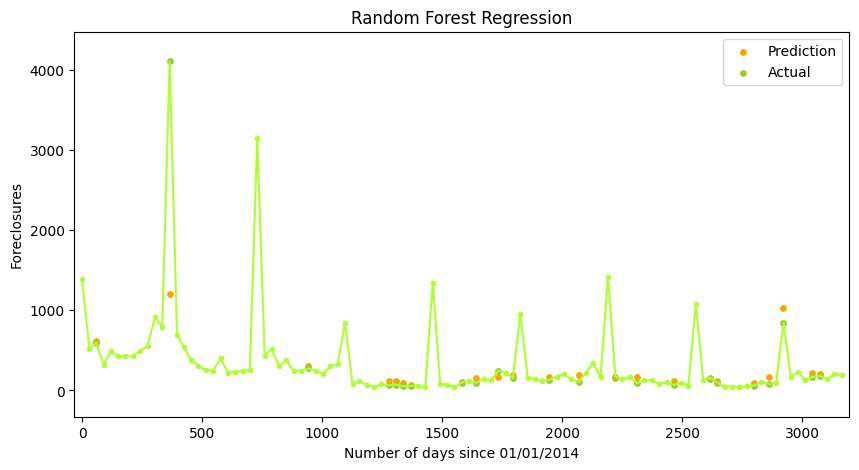

In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import metrics

df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))


df['DATE'] = pd.to_datetime(df['DATE']) 
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels = (df.columns)
feature_labels = feature_labels.drop(['FORECLOSURE','DATE'])
X = df[feature_labels]
y = df[['FORECLOSURE']]


# Plot the results
n_estimators = 250
test_size = 23
random_state=88
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
regressor = RandomForestRegressor(n_estimators=250,bootstrap=True, max_features=0.80, min_weight_fraction_leaf=0.05)
regressor.fit(X_train,y_train.to_numpy().flatten())
y_pred = regressor.predict(X_test)
y_pred
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=15,  c="orange", label="Prediction")
plt.scatter(X_test['DATE_DELTA'], y_test, s=15, c="yellowgreen", label="Actual")
r2 = r2_score(y_test,y_pred)
print(f"r2_score: {r2} rand_state = {i}")

plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Random Forest Regression")
plt.legend()
plt.savefig('../plots/RandomForestRegression.png')
plt.show()